In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

In [3]:
df = pd.read_csv("WineQT.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [9]:
# because of all numerical column i can plot histogram


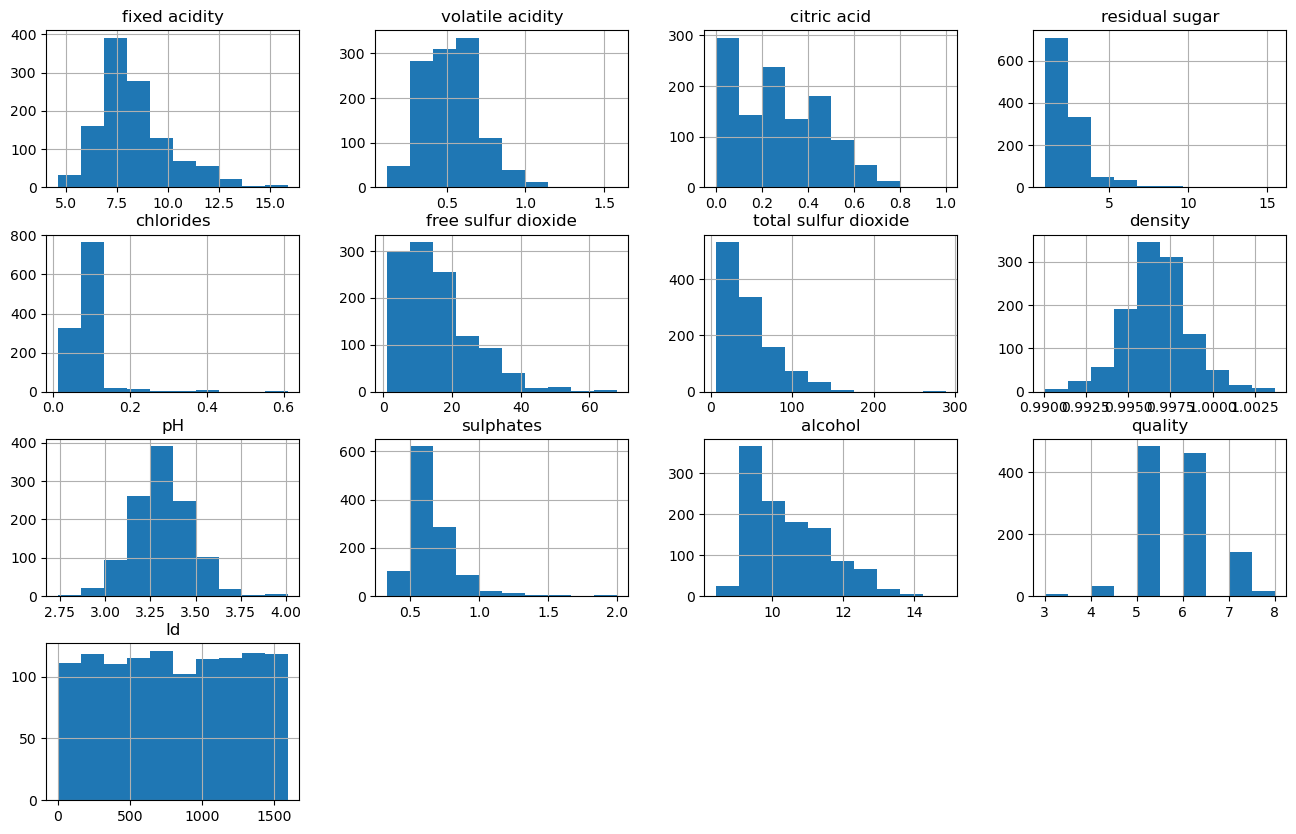

In [13]:
df.hist(figsize = (16,10));

In [15]:
df.corr()['quality']

fixed acidity           0.121970
volatile acidity       -0.407394
citric acid             0.240821
residual sugar          0.022002
chlorides              -0.124085
free sulfur dioxide    -0.063260
total sulfur dioxide   -0.183339
density                -0.175208
pH                     -0.052453
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Id                      0.069708
Name: quality, dtype: float64

In [16]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [66]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,best quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379,0.543307
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116,0.498339
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000,1.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000,1.000000


In [65]:
# df.to_csv('WineQT_target_with_class.csv')

<Axes: ylabel='best quality'>

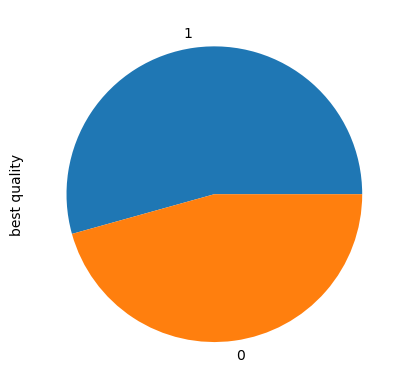

In [20]:
df['best quality'].value_counts().plot(kind='pie')

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [23]:
X = df.drop(['quality', 'best quality'], axis =1)
y = df['best quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=40)


In [60]:
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(914, 12)
(229, 12)
(914,)
(229,)


In [27]:
from sklearn.preprocessing import StandardScaler
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold ,cross_val_score


In [32]:
models = []
models.append(('LR', LogisticRegression(max_iter=400)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGboost',XGBClassifier()))

In [34]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.749570 (0.051135)
KNN: 0.712195 (0.032552)
RF: 0.804372 (0.053250)
NB: 0.734209 (0.053407)
XGboost: 0.790110 (0.051516)


In [35]:
from sklearn.ensemble import RandomForestClassifier

kfold = KFold(n_splits=10)
model2 = RandomForestClassifier()

results = cross_val_score(model2, X_train, y_train, cv=kfold)

print("Average Accuracy",results.mean())
print("SD ",results.std())
print(results.min(),results.max())

Average Accuracy 0.8054347826086955
SD  0.05378141734652152
0.6956521739130435 0.8586956521739131


In [54]:

model_final = RandomForestClassifier()
model_final.fit(X_train,y_train)


RandomForestClassifier()

In [63]:
y_pred_fin = model_final.predict(X_test)

confusion_matrix(y_pred_fin, y_test)

array([[ 77,  26],
       [ 20, 106]], dtype=int64)